# Peer 

## AirBNB_Data (101.5 MB)

#### This dataset was found on kaggle: https://www.kaggle.com/datasets/paramvir705/airbnb-data/data

#### On the website, it says it has an "Apache 2.0" license. This means we can use, modify, and distribute the dataset freely, even for commercial purposes, under the terms of the Apache License 2.0. 

## Features of License

#### Free Redistribution: You can freely redistribute the dataset.
#### Source Code: The dataset can be used in modified or unmodified form.
#### Patent Grant: The license provides an explicit grant of patent rights from contributors to users.
#### Protection Against Trademark Abuse: The license does not allow the use of the names of the contributors for endorsement of derived products without a separate agreement.
#### No Warranty: The dataset is provided "as is" without warranties, similar to other permissive licenses.



In [11]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("/Users/febeyemima/Downloads/Airbnb_Data.csv")
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


# Above is a glimpse of what the data looks like which is 74111 rows and 29 columns. Below I have put the column names with their data types.

In [13]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

# Below is a a stacked area chart of Airbnb listings over time, differentiated by city. We can see that SF has the greatest cumulative listing over time.

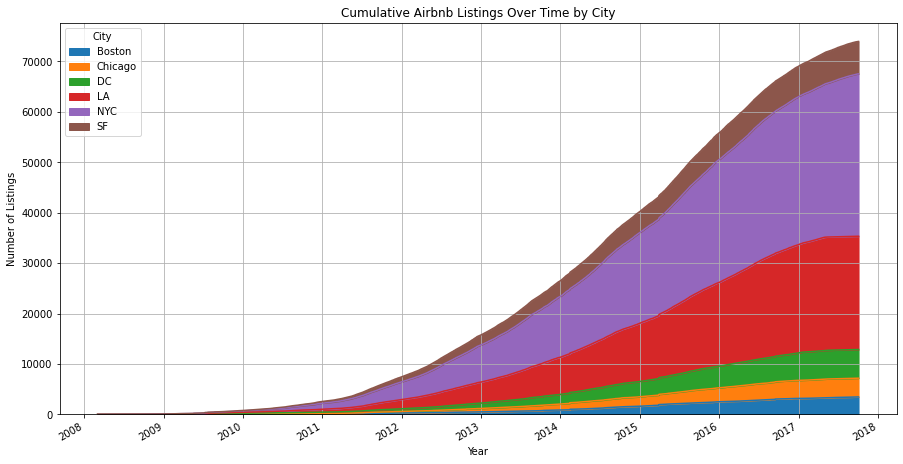

In [16]:
df['host_since'] = pd.to_datetime(df['host_since'])

# Drop rows where 'host_since' is NaN
airbnb_data = df.dropna(subset=['host_since'])

# Group by 'host_since' and 'city' and count the number of listings
listings_over_time = df.groupby(['host_since', 'city']).size().unstack(fill_value=0).cumsum()

# Create a stacked area chart
plt.figure(figsize=(15, 8))
listings_over_time.plot(kind='area', stacked=True, ax=plt.gca())
plt.title('Cumulative Airbnb Listings Over Time by City')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.legend(title='City')
plt.grid(True)
plt.show()

# Below is a Bubble Chart displaying the average price, number of listings, and average review scores for each city in the Airbnb dataset. We can see that cities like Chicago, DC, LA, NYC, and SF have lower amount of listings compared to LA. 

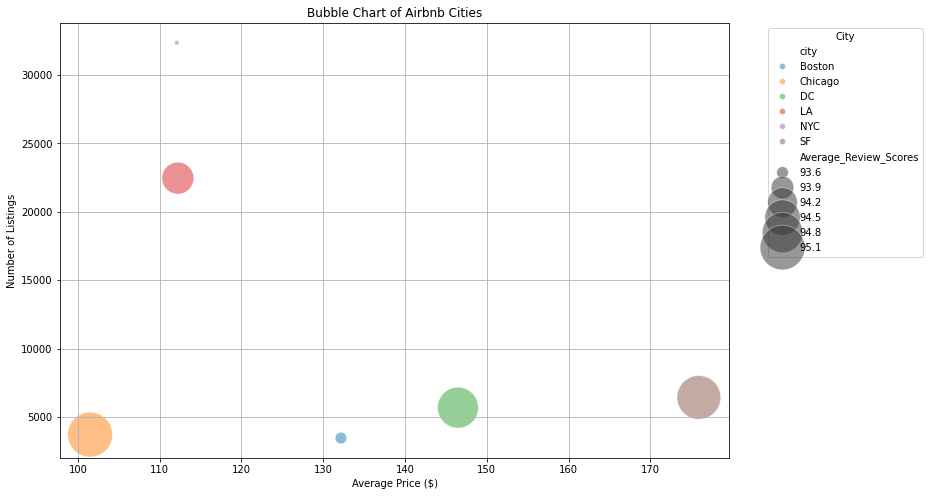

In [15]:
city_metrics = df.groupby('city').agg(
    Average_Price=('log_price', 'mean'),
    Number_of_Listings=('id', 'size'),
    Average_Review_Scores=('review_scores_rating', 'mean')
).reset_index()

# Convert log price to normal price for better understanding
city_metrics['Average_Price'] = np.exp(city_metrics['Average_Price'])

# Create the bubble chart
plt.figure(figsize=(12, 8))
bubble_chart = sns.scatterplot(data=city_metrics, x='Average_Price', y='Number_of_Listings', 
                               size='Average_Review_Scores', hue='city', sizes=(20, 2000), alpha=0.5, legend='brief')
bubble_chart.set_title('Bubble Chart of Airbnb Cities')
bubble_chart.set_xlabel('Average Price ($)')
bubble_chart.set_ylabel('Number of Listings')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()